### <font color=green> 1. Importing libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from datetime import timedelta, date

import warnings
warnings.filterwarnings('ignore')

### <font color=green>2. Data Inspection </font>

#### Structure of Data

In [2]:
# Reading data
sales = pd.read_excel("MRR Task Data.xlsx",sheet_name='ds sales data')
license = pd.read_excel("MRR Task Data.xlsx",sheet_name='ds license data')

In [3]:
import os
os.getcwd()

'D:\\Anaconda\\MRR'

In [4]:
# Inspecting sales data
print(sales.shape)
sales.head(2)

(4012, 16)


,transactionId,addonLicenseId,hostLicenseId,licenseId,saleDate,addonName,addonKey,hosting,billingPeriod,tier,licenseType,maintenanceStartDate,maintenanceEndDate,saleType,purchasePrice,vendorAmount
0,AT-71004759,12322025,12260340.0,SEN-12339366,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (12 users),COMMERCIAL,2019-02-24,2019-03-24,Renewal,6.0,4.50
1,AT-71004540,12808966,12182250.0,SEN-12261475,2019-02-24,Smart Checklist for Jira. Enterprise,rw-smart-checklist-biz,Cloud,Monthly,Per Unit Pricing (10 users),COMMERCIAL,2019-02-24,2019-03-24,Renewal,5.0,3.75


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 16 columns):
transactionId           4012 non-null object
addonLicenseId          4012 non-null int64
hostLicenseId           3597 non-null float64
licenseId               4012 non-null object
saleDate                4012 non-null datetime64[ns]
addonName               4012 non-null object
addonKey                4012 non-null object
hosting                 4012 non-null object
billingPeriod           4012 non-null object
tier                    4012 non-null object
licenseType             4012 non-null object
maintenanceStartDate    4012 non-null datetime64[ns]
maintenanceEndDate      4012 non-null datetime64[ns]
saleType                4012 non-null object
purchasePrice           4012 non-null float64
vendorAmount            4012 non-null float64
dtypes: datetime64[ns](3), float64(3), int64(1), object(9)
memory usage: 501.6+ KB


`hostLicenseId` is null for 415 sales data rows

In [6]:
# Inspecting license data
print(license.shape)
license.head(2)

(918, 11)


,addonLicenseId,hostLicenseId,licenseId,addonKey,addonName,licenseType,maintenanceStartDate,maintenanceEndDate,status,hosting,tier
0,13235537,NaN,SEN-13234022,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2019-02-23,2020-02-23,active,Server,10 Users
1,13164943,NaN,SEN-13224618,rw-smart-checklist-biz,Smart Checklist for Jira. Enterprise,COMMERCIAL,2019-02-21,2020-02-21,active,Server,25 Users


In [7]:
license.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
addonLicenseId          918 non-null int64
hostLicenseId           584 non-null float64
licenseId               918 non-null object
addonKey                918 non-null object
addonName               918 non-null object
licenseType             918 non-null object
maintenanceStartDate    918 non-null datetime64[ns]
maintenanceEndDate      918 non-null datetime64[ns]
status                  918 non-null object
hosting                 918 non-null object
tier                    918 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 79.0+ KB


`hostLicenseId` is null for 334 license data rows

### <font color=green> 3. Data Analysis </font>
#### 4.1. Univariate Analysis

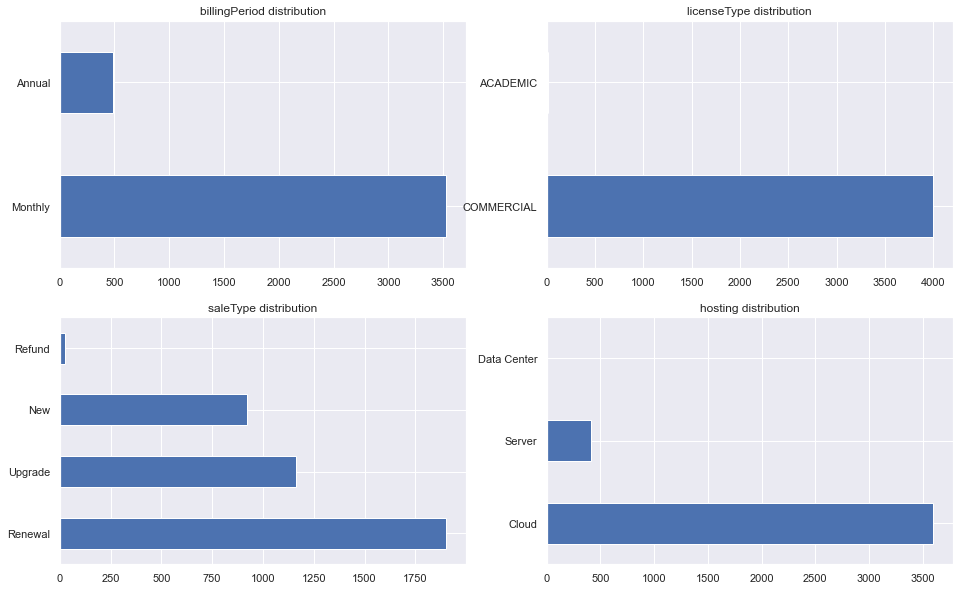

In [8]:
cont_vars = ['billingPeriod', 'licenseType', 'saleType', 'hosting']

%matplotlib inline
plt.figure(figsize=(16,10))
sns.set(color_codes=True)
for i in enumerate(cont_vars):
    plt.subplot(2,2,i[0]+1)
    title = i[1] + ' distribution' 
    plt.title(title)
    sales[i[1]].value_counts().plot.barh()
plt.show()

In [9]:
sales.columns

Index(['transactionId', 'addonLicenseId', 'hostLicenseId', 'licenseId',
       'saleDate', 'addonName', 'addonKey', 'hosting', 'billingPeriod', 'tier',
       'licenseType', 'maintenanceStartDate', 'maintenanceEndDate', 'saleType',
       'purchasePrice', 'vendorAmount'],
      dtype='object')

#### Treating missing values and Artifacting Column Names and removing unnecessary columns

In [10]:
cols_to_drop = ['addonLicenseId','hostLicenseId','saleDate','addonName','addonKey','tier','vendorAmount']
sales.drop(columns = cols_to_drop, inplace=True)

sales.head()

,transactionId,licenseId,hosting,billingPeriod,licenseType,maintenanceStartDate,maintenanceEndDate,saleType,purchasePrice
0,AT-71004759,SEN-12339366,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Renewal,6.0
1,AT-71004540,SEN-12261475,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Renewal,5.0
2,AT-71002970,SEN-11736283,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Renewal,22.5
3,AT-71000730,SEN-10925509,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Upgrade,7.0
4,AT-71000029,SEN-10374853,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Upgrade,34.5


In [11]:
# Artifacting column names
sales = sales.rename(columns = {'maintenanceStartDate':'StartDate',
                               'maintenanceEndDate':'EndDate',
                               'purchasePrice':'Price'
                               })

In [12]:
sales['ndays'] = sales['EndDate'] - sales['StartDate']
sales['ndays'] = sales['ndays'].dt.days
sales['month'] = sales['StartDate'].values.astype('datetime64[M]')

In [13]:
sales.head()

,transactionId,licenseId,hosting,billingPeriod,licenseType,StartDate,EndDate,saleType,Price,ndays,month
0,AT-71004759,SEN-12339366,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Renewal,6.0,28,2019-02-01
1,AT-71004540,SEN-12261475,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Renewal,5.0,28,2019-02-01
2,AT-71002970,SEN-11736283,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Renewal,22.5,28,2019-02-01
3,AT-71000730,SEN-10925509,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Upgrade,7.0,28,2019-02-01
4,AT-71000029,SEN-10374853,Cloud,Monthly,COMMERCIAL,2019-02-24,2019-03-24,Upgrade,34.5,28,2019-02-01


In [14]:
# Creating Seperate dataframes for monthly and annual data
a_sales = sales[sales['billingPeriod']=='Annual']
m_sales = sales[sales['billingPeriod']=='Monthly']

### <font color=green> 4. MRR Calculation </font>

#### 4.1 Monthly Data

In [15]:
# Creating variables with min of StartDate and max of EndDate

Start_Date = min(sales['StartDate'])
End_Date = max(sales['EndDate'])

In [16]:
# Defining function to derive date for monthly calculation

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [17]:
# calculate recurring revenue (rr) for every day and storing them in a list
daily_rr=[]

for my_date in daterange(Start_Date, End_Date):
    date_df = m_sales[m_sales['StartDate'] == my_date ]
    rr = date_df['Price'].sum()
    
    daily_rr.append({'mdate':my_date,'mrr':rr})

In [19]:
# Creating dataframe from the list
daily_df = pd.DataFrame(daily_rr)
# Converting date column datatype to datetime
daily_df['mdate'] =pd.to_datetime(daily_df['mdate'], format = '%Y-%m-%d')

In [20]:
# Converting date to 1st date of the month
daily_df['mdate'] = daily_df['mdate'].values.astype('datetime64[M]')

In [21]:
daily_df.head()

,mdate,mrr
0,2017-02-01,30.0
1,2017-02-01,0.0
2,2017-03-01,0.0
3,2017-03-01,5.0
4,2017-03-01,0.0


In [22]:
# calculating monthly recurring revenue by aggregating sales by month
month_df = pd.pivot_table(data=daily_df, index='mdate', aggfunc={'mrr':np.sum})
month_df = month_df.sort_values(ascending=True, by='mdate').reset_index()

In [23]:
month_df['sales'] = month_df['mrr']
month_df.head()

,mdate,mrr,sales
0,2017-02-01,30.0,30.0
1,2017-03-01,110.0,110.0
2,2017-04-01,185.0,185.0
3,2017-05-01,305.0,305.0
4,2017-06-01,350.0,350.0


For Monthly data, `mrr` and cummulative sales (`sales`) counts are same

In [24]:
month_df.set_index('mdate', inplace = True)

####  4.2 Annual data

In [47]:
# Calcualting no. of months based on ndays
a_sales['nmonths'] = round(a_sales['ndays']/30).astype(int)
a_sales.head()

,transactionId,licenseId,hosting,billingPeriod,licenseType,StartDate,EndDate,saleType,Price,ndays,month,nmonths
13,AT-70778314,SEN-13234022,Server,Annual,COMMERCIAL,2019-02-24,2020-02-24,New,10.0,365,2019-02-01,12
14,AT-70302476,SEN-11450009,Server,Annual,COMMERCIAL,2019-03-27,2020-03-27,Renewal,75.0,366,2019-03-01,12
26,AT-70902112,SEN-13224618,Server,Annual,COMMERCIAL,2019-02-22,2020-02-22,New,35.0,365,2019-02-01,12
27,AT-70900425,SEN-13222431,Server,Annual,COMMERCIAL,2019-02-22,2020-02-22,New,10.0,365,2019-02-01,12
38,AT-70844928,SEN-11287498,Server,Annual,COMMERCIAL,2019-02-21,2020-02-21,Upgrade,125.0,365,2019-02-01,12


In [48]:
# Creating an intermittent level dataframe for annual mrr calculation
a_sales2 = a_sales[['month','Price','nmonths']].sort_values(ascending=True, by='month').reset_index(drop=True)
a_sales2.head()

,month,Price,nmonths
0,2017-03-01,163.0,7
1,2017-04-01,10.0,12
2,2017-04-01,10.0,12
3,2017-05-01,37.5,24
4,2017-05-01,172.0,4


In [49]:
# Defining function for calculating 1st day of all the months within provided range
def months(start_date, end_date, day=1):
    
    start = start_date.year * 12 + (start_date.month - 1)
    if start_date.day > day:              # already in this month, so start counting at the next
        start += 1
    end = end_date.year * 12 + (end_date.month - 1)
    
    if end_date.day > day:                # end date is past the reference day, include the reference     
        end += 1                          # date in the output
    
    for ordinal in range(start, end):     # generate the months, just a range from start to end
        yield date(ordinal // 12, (ordinal % 12) + 1, day)
    

In [50]:
m_list = []
# creating list of dates
for mvar in months(Start_Date, End_Date):
    m_list.append(mvar)

# Storing list of 1st dates in a dataframe
annual_df = pd.DataFrame(m_list, columns=['mdate'])

In [51]:
# Adding mrr column with 0 value
annual_df['mrr'] = 0.0

annual_df.head()

,mdate,mrr
0,2017-03-01,0.0
1,2017-04-01,0.0
2,2017-05-01,0.0
3,2017-06-01,0.0
4,2017-07-01,0.0


In [53]:
# Calculating mrr on a_sales2 dataframe and populating in annual_df

for i in range(len(a_sales2)):
    r = a_sales2['nmonths'][i]                                    # no. of months
    p = a_sales2['Price'][i]/r                                    # Sales / no. of months 
    k = annual_df[annual_df['mdate']==a_sales2['month'][i]].index.values    #storing index of monthly row in annual_df
    # running loop starting k, since we have multiple rows of a month in intermittent table a_sales3
    
    for j in range(k[0],r+k[0],1):                                
        annual_df['mrr'][j] = annual_df['mrr'][j] + p              # updating mrr attribute

In [29]:
annual_df.head()

,mdate,mrr
0,2017-03-01,23.285714
1,2017-04-01,24.952381
2,2017-05-01,69.514881
3,2017-06-01,69.514881
4,2017-07-01,186.848214


In [30]:
# calculating sales aggregation by month
a_sales3 = pd.pivot_table(data= a_sales2, index='month', aggfunc={'Price':np.sum})
a_sales3.head()

,Price
month,
2017-03-01,163.0
2017-04-01,20.0
2017-05-01,209.5
2017-07-01,1408.0
2017-08-01,576.0


In [31]:
# renaming columns 
a_sales3.rename(columns={'Price': 'sales'}, inplace=True)
a_sales3.index.rename('mdate', inplace=True)

In [32]:
# joining annual_df and with intermittent table to contain mrr and sales data
annual_df.set_index('mdate',inplace=True)
annual_df = annual_df.add(a_sales3, fill_value=0)
annual_df.fillna(0, inplace=True)
annual_df.head()

,mrr,sales
mdate,,
2017-03-01,23.285714,163.0
2017-04-01,24.952381,20.0
2017-05-01,69.514881,209.5
2017-06-01,69.514881,0.0
2017-07-01,186.848214,1408.0


#### 3.3 MRR Result

In [33]:
# Adding MOnthly and Annual MRR and Sales data

final_df = month_df.add(annual_df, fill_value=0).reset_index()
final_df.rename(columns={'mdate': 'Month', 'mrr':'MRR', 'sales':'Sales'}, inplace=True)
final_df.head()

,Month,MRR,Sales
0,2017-02-01,30.000000,30.0
1,2017-03-01,133.285714,273.0
2,2017-04-01,209.952381,205.0
3,2017-05-01,374.514881,514.5
4,2017-06-01,419.514881,350.0


### <font color=green> 5. Data Visualization </font>

#### 5.1 Line plot of Monthly Recurring Revenue 

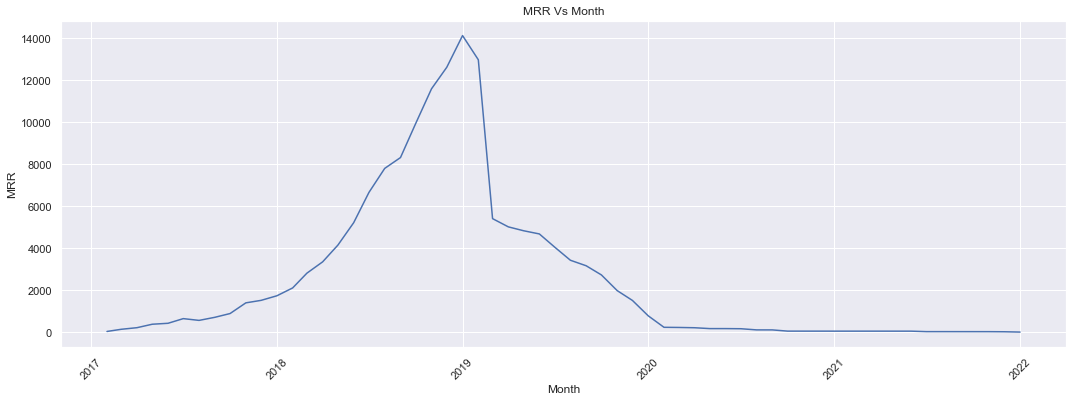

In [34]:
# Using seaborn
#%matplotlib qt
final_df['Month'] = final_df['Month'].dt.date

plt.figure(figsize=(18,6))
sns.lineplot(x='Month' ,y='MRR' ,data= final_df)
plt.xticks(rotation=45)
plt.title('MRR Vs Month')
plt.show()

#### 5.2 Line plot of Monthly Recurring Revenue (Interactive)

In [35]:
from bokeh.plotting import figure, output_notebook, show
#from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import  FixedTicker, FuncTickFormatter

output_notebook()

#tool_list = [HoverTool()]#, BoxSelectTool()]

# Generate canvas
fig = figure(x_axis_type = "datetime",
             title='MRR Vs Month',
             x_axis_label='Month',
             y_axis_label='Monthly Recurring Revenue',
             width=900,
             height=400)
             #tools=tool_list)

# Draw the line
fig.line(final_df['Month'], final_df['MRR'], 
         line_alpha=0.8,
         color ='purple',
         legend = 'mrr', 
         line_width=2)

show(fig)

Loading BokehJS ...

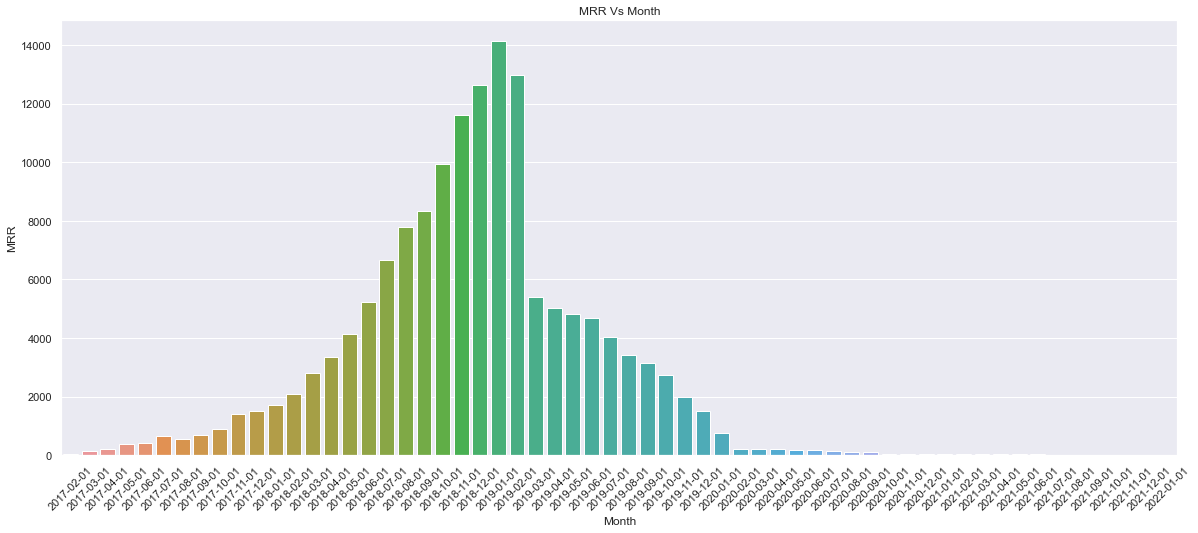

In [36]:

%matplotlib qt
plt.figure(figsize=(20,8))
sns.barplot(x='Month' , y='MRR' , data=final_df)
plt.xticks(rotation=45)
plt.title('MRR Vs Month')
plt.show()

#### 5.3 Sales Volume per month


In [37]:
sales['month'] = sales['month'].dt.date
Order_by_month = sales.pivot_table(index='month',  aggfunc=len ).reset_index()[['month','EndDate']]

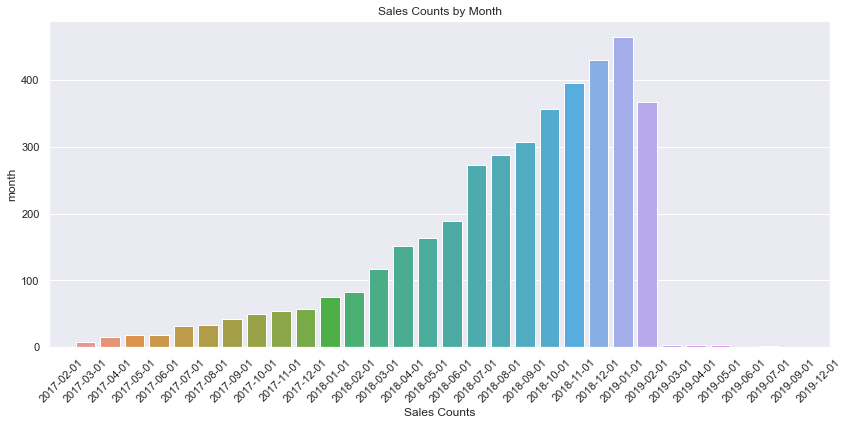

In [38]:
plt.figure(figsize=(14,6))
Order_by_month = pd.DataFrame(sales['month'].value_counts()).reset_index()
Order_by_month = Order_by_month.sort_values(by='index')

sns.barplot(x='index',y='month',data=Order_by_month)
plt.xticks(rotation=45)
plt.title('Sales Counts by Month')
plt.xlabel('Month')
plt.xlabel('Sales Counts')
plt.show()

#### 5.4 Sales Volume per month (Interactive Plotting)

In [39]:
# Generating pivot table for generating Interactive billing types by month graph

billperiod_month = sales[['month','billingPeriod','EndDate']].pivot_table(index='month',columns='billingPeriod',aggfunc=len,fill_value=0)

Annual_value = list(billperiod_month['EndDate']['Annual'].values.reshape(1,-1)[0])

Monthly_value = list(billperiod_month['EndDate']['Monthly'].values.reshape(1,-1)[0])

months_list = ['2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
          '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11',
          '2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09'] 

In [40]:
from bokeh.io import output_file
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, BoxSelectTool
import math
output_notebook()

output_file("stacked.html")

billPeriod = ['Monthly','Annual']
colors = ["#c9d9d3", "#e84d60"]

data = {'months' : months_list,
        'Monthly': Monthly_value, 
        'Annual' : Annual_value} 

tool_list = [HoverTool(), BoxSelectTool()]
#colors = ["#c9d9d3", "#718dbf", "#e84d60"]

fig = figure( x_range=months_list, plot_height=400, title="Billing Type Counts by Month",
           toolbar_location=None, tooltips=" $name: @$name",# tooltips="$name @billPeriod: @$name",
           width=900, x_axis_label='Month',
             y_axis_label='Sales Count by billigPeriod',tools=tool_list)#, tools="hover")

fig.vbar_stack( billPeriod,x='months', width=0.9, color=colors, source=data,line_width=2 )#, legend=billPeriod)

fig.y_range.start = 0
fig.x_range.range_padding = 0.1
fig.xgrid.grid_line_color = None
fig.axis.minor_tick_line_color = None
fig.outline_line_color = None
fig.legend.location = "top_right"
#fig.legend.orientation = "horizontal"
fig.xaxis.major_label_orientation = math.pi/4 

show(fig)

Loading BokehJS ...

### <font color=green> 5. Churn rate calculation </font>

In [41]:
# calculating new addition of subscription per month
sales.saleType.value_counts()

Renewal    1902
Upgrade    1164
New         921
Refund       25
Name: saleType, dtype: int64

In [42]:
sales['new_sales'] = sales['saleType'].replace(['Renewal','Upgrade','Refund'],0, inplace=False)
sales['new_sales'].replace('New',1, inplace=True)
sales['new_sales'].value_counts()

0    3091
1     921
Name: new_sales, dtype: int64

In [43]:
new_sales_df = pd.DataFrame(sales.groupby('month').new_sales.sum())
new_sales_df.head()

,new_sales
month,
2017-02-01,1
2017-03-01,7
2017-04-01,11
2017-05-01,8
2017-06-01,3


In [44]:
max(sales['StartDate'])

Timestamp('2019-12-11 00:00:00')

In [45]:
# Removing 'AT-' from transactionids
sales['transactionId'] = sales['transactionId'].str.replace(r'AT-', '')

In [46]:
# Sales grouped on licenseId and picked their last entry
license_grouped_df = sales.sort_values('transactionId').groupby('licenseId').tail(1)

# Licenses having expiry befure last maintenenceStartdate entry
license_grouped_df = license_grouped_df[license_grouped_df['EndDate'] < max(license_grouped_df['StartDate'])]

# Creating churn_df with churn counts per month
churn_df = pd.DataFrame(license_grouped_df.groupby('month').licenseId.count())

In [47]:
# renaming renaming churn cnt variable
churn_df.rename(columns={"licenseId":"churn"}, inplace=True) 
churn_df.head()

,churn
month,
2017-03-01,2
2017-04-01,4
2017-05-01,2
2017-06-01,2
2017-07-01,1


In [48]:
churn_df = churn_df.add(new_sales_df, fill_value=0).reset_index()
churn_df.fillna(0, inplace= True)
churn_df.head()

,month,churn,new_sales
0,2017-02-01,0.0,1.0
1,2017-03-01,2.0,7.0
2,2017-04-01,4.0,11.0
3,2017-05-01,2.0,8.0
4,2017-06-01,2.0,3.0


In [49]:
# Calculating churn rate
churn_df['churn_rate'] = churn_df['churn'].mul(100).div((churn_df['new_sales'].cumsum() - churn_df['churn'].cumsum().shift()).fillna(churn_df['new_sales']))

In [50]:
churn_df.head()

,month,churn,new_sales,churn_rate
0,2017-02-01,0.0,1.0,0.000000
1,2017-03-01,2.0,7.0,25.000000
2,2017-04-01,4.0,11.0,23.529412
3,2017-05-01,2.0,8.0,9.523810
4,2017-06-01,2.0,3.0,9.090909



### <font color=green> 6. Visualizing Churn Rate </font>



In [51]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

# Generate canvas
fig = figure(x_axis_type = "datetime",
             title='Sales/ Churn/ Churn_Rate Vs Month',
             x_axis_label='Month',
             y_axis_label='Sales/ Churn/ Churn_Rate',
             width=900,
             height=400)#,
             #y_axis_type='log')

x = churn_df['month']
y1 = churn_df['churn']
y2 = churn_df['new_sales']
y3 = churn_df['churn_rate']

# Drawing line
fig.line(x , y1, line_alpha=0.8, color ='purple', legend = 'churn', line_width=2)
fig.circle(x, y1, legend = 'churn', color='purple', fill_color='white', size=5)

fig.line(x , y2, line_alpha=0.8, color ='blue', legend = 'new_sales', line_width=2)
fig.square(x, y2, legend = 'new_sales', color='blue', fill_color='white', size=5)

fig.line(x , y3, line_alpha=0.8, color ='green', legend = 'churn_rate', line_width=2)
fig.diamond(x, y3, legend = 'churn_rate', color='green', fill_color='white', size=5)

show(fig)

Loading BokehJS ...

#### Observations:
1. Churn count has increased significantly in Jan,19 so as churn rate. 

This is  because we have no or negligibly low new sales from Jan, 19 and all existing monthly licenseIds have fallen into the category of churn licenseIds.

2. New Sales have started reducing from Jan,19


3. A lot more like probable churn candidates and other insights can be identified   by applying classical Machine Learning algorithms.

In [2]:
!jupyter nbconvert --to html MRR_Analysis.ipynb

[NbConvertApp] Converting notebook MRR_Analysis.ipynb to html
[NbConvertApp] Writing 562011 bytes to MRR_Analysis.html
